<a href="https://colab.research.google.com/github/NikhitaShankar97/Stock-Market-Forecasting/blob/main/Stock_Market_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interactive Stock Price Prediction App Using Multiple Machine Learning Models**


---



### This code uses the yfinance library to download historical stock data for a specified list of stock symbols (e.g., AAPL, MSFT, GOOG) over a given date range (January 1, 2010, to December 31, 2024). It then prints the retrieved data.


In [ ]:
import yfinance as yf
# Fetch all stocks in a specific industry
stock_symbols = ["AAPL", "MSFT", "GOOG"]  # Add more tickers
data = yf.download(stock_symbols, start="2010-01-01", end="2024-12-31")
print(data)


[*********************100%***********************]  3 of 3 completed

Price        Adj Close                               Close              \
Ticker            AAPL        GOOG        MSFT        AAPL        GOOG   
Date                                                                     
2010-01-04    6.447411   15.571998   23.300680    7.643214   15.610239   
2010-01-05    6.458559   15.503423   23.308208    7.656429   15.541497   
2010-01-06    6.355827   15.112601   23.165163    7.534643   15.149715   
2010-01-07    6.344077   14.760787   22.924252    7.520714   14.797037   
2010-01-08    6.386256   14.957565   23.082359    7.570714   14.994298   
...                ...         ...         ...         ...         ...   
2024-12-03  242.649994  173.020004  431.200012  242.649994  173.020004   
2024-12-04  243.009995  176.089996  437.420013  243.009995  176.089996   
2024-12-05  243.039993  174.309998  442.619995  243.039993  174.309998   
2024-12-06  242.839996  176.490005  443.570007  242.839996  176.490005   
2024-12-09  246.750000  177.100006  44

### **Fetching and Visualizing Stock Data by Industry**

### This code downloads and organizes stock data by industry (Tech, Automobile, Retail, Healthcare, and Energy) and visualizes the closing prices for Tech stocks.
### How it builds on: it multiple industries, handling errors, and plotting data for a specific sector.

[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  4 of 4 completed


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  4 of 4 completed


MultiIndex([('NVDA',      'Open'),
            ('NVDA',      'High'),
            ('NVDA',       'Low'),
            ('NVDA',     'Close'),
            ('NVDA', 'Adj Close'),
            ('NVDA',    'Volume'),
            ('META',      'Open'),
            ('META',      'High'),
            ('META',       'Low'),
            ('META',     'Close'),
            ('META', 'Adj Close'),
            ('META',    'Volume'),
            ('GOOG',      'Open'),
            ('GOOG',      'High'),
            ('GOOG',       'Low'),
            ('GOOG',     'Close'),
            ('GOOG', 'Adj Close'),
            ('GOOG',    'Volume'),
            ('AAPL',      'Open'),
            ('AAPL',      'High'),
            ('AAPL',       'Low'),
            ('AAPL',     'Close'),
            ('AAPL', 'Adj Close'),
            ('AAPL',    'Volume'),
            ('MSFT',      'Open'),
            ('MSFT',      'High'),
            ('MSFT',       'Low'),
            ('MSFT',     'Close'),
            ('MSFT',

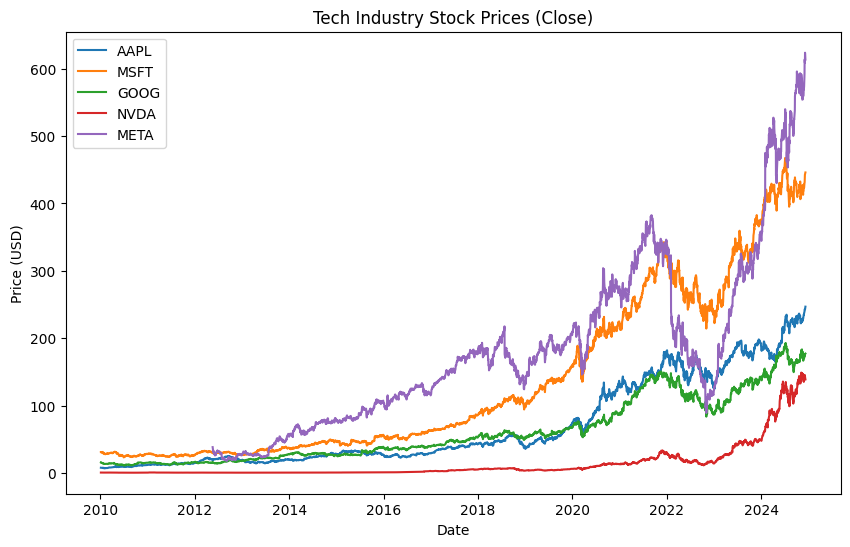

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define stocks by industries
industries = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "META"],  # Add more tech tickers
    "Automobile": ["TSLA", "F", "GM", "TM", "HMC"],   # Add auto tickers
    "Retail": ["WMT", "TGT", "COST", "AMZN"],          # Add retail tickers
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"], # Add healthcare tickers
    "Energy": ["XOM", "CVX", "BP", "SLB"],            # Removed TOT due to error
}

# Initialize dictionary to hold stock data
industry_data = {}

# Fetch data for each industry
for industry, tickers in industries.items():
    print(f"Downloading data for {industry}...")
    try:
        industry_data[industry] = yf.download(
            tickers,
            start="2010-01-01",
            end="2024-12-31",
            group_by="ticker"  # Ensures individual data for each ticker
        )
    except Exception as e:
        print(f"Error downloading data for {industry}: {e}")

# Example to check data for one industry
print(industry_data["Tech"].keys())  # Print column names for Tech industry

# Visualization example: Closing prices for Tech
plt.figure(figsize=(10, 6))
for ticker in industries["Tech"]:
    if ticker in industry_data["Tech"]:  # Avoid errors for missing tickers
        plt.plot(
            industry_data["Tech"][ticker]["Close"],
            label=ticker
        )

plt.title("Tech Industry Stock Prices (Close)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### **Interactive Stock Data Fetcher with Widgets**

### This code adds interactive widgets to allow users to select an industry, choose stocks, and set a date range to fetch and plot stock data.
### How it builds on: it incorporates widgets for user input and displaying the results dynamically based on selected options.

In [ ]:
# Install necessary libraries
!pip install yfinance matplotlib ipywidgets --quiet

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

# Define industries and stock tickers
industries = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "META"],
    "Automobile": ["TSLA", "F", "GM", "TM", "HMC"],
    "Retail": ["WMT", "TGT", "COST", "AMZN"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"],
    "Energy": ["XOM", "CVX", "BP", "SLB"],
}

# Widgets for interaction
industry_dropdown = widgets.Dropdown(
    options=industries.keys(),
    value="Tech",
    description="Industry:",
    style={"description_width": "initial"}
)

stock_multi_select = widgets.SelectMultiple(
    options=industries["Tech"],
    value=["AAPL", "MSFT"],
    description="Stocks:",
    style={"description_width": "initial"}
)

start_date_picker = widgets.DatePicker(
    description="Start Date:",
    value=pd.to_datetime("2020-01-01").date(),
    style={"description_width": "initial"}
)

end_date_picker = widgets.DatePicker(
    description="End Date:",
    value=pd.to_datetime("2024-12-31").date(),
    style={"description_width": "initial"}
)

output = widgets.Output()

# Update stocks based on selected industry
def update_stocks(*args):
    stock_multi_select.options = industries[industry_dropdown.value]
    stock_multi_select.value = industries[industry_dropdown.value][:2]  # Default to first two stocks

industry_dropdown.observe(update_stocks, names="value")

# Fetch and display data
def fetch_and_plot_data(change):
    with output:
        output.clear_output()
        selected_stocks = list(stock_multi_select.value)
        if not selected_stocks:
            print("Please select at least one stock.")
            return

        print(f"Fetching data for: {', '.join(selected_stocks)}")
        try:
            # Download data
            data = yf.download(
                selected_stocks,
                start=start_date_picker.value,
                end=end_date_picker.value,
                group_by="ticker"
            )

            # Plot closing prices
            plt.figure(figsize=(12, 6))
            for stock in selected_stocks:
                plt.plot(data[stock]["Close"], label=stock)
            plt.title(f"Closing Prices for Selected Stocks")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid()
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

# Button to trigger data fetch
fetch_button = widgets.Button(description="Fetch Data")
fetch_button.on_click(fetch_and_plot_data)

# Layout
display(
    widgets.VBox([
        industry_dropdown,
        stock_multi_select,
        widgets.HBox([start_date_picker, end_date_picker]),
        fetch_button,
        output
    ])
)


### **Stock Price Forecasting with Linear Regression**

### This code allows users to select a stock, set a date range, and forecast its future prices using linear regression.
### How it builds on: it adds machine learning functionality to predict stock prices based on historical data and displaying a forecast with model evaluation (MSE).

In [ ]:
# Install necessary libraries
!pip install yfinance matplotlib ipywidgets scikit-learn --quiet

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from IPython.display import display
import ipywidgets as widgets

# Define industries and stock tickers
industries = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "META"],
    "Automobile": ["TSLA", "F", "GM", "TM", "HMC"],
    "Retail": ["WMT", "TGT", "COST", "AMZN"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"],
    "Energy": ["XOM", "CVX", "BP", "SLB"],
}

# Widgets for interaction
industry_dropdown = widgets.Dropdown(
    options=industries.keys(),
    value="Tech",
    description="Industry:",
    style={"description_width": "initial"}
)

stock_dropdown = widgets.Dropdown(
    options=industries["Tech"],
    value="AAPL",
    description="Stock:",
    style={"description_width": "initial"}
)

start_date_picker = widgets.DatePicker(
    description="Start Date:",
    value=pd.to_datetime("2015-01-01").date(),
    style={"description_width": "initial"}
)

end_date_picker = widgets.DatePicker(
    description="End Date:",
    value=datetime.today().date(),  # Set the end date to today's date
    style={"description_width": "initial"}
)

forecast_days_slider = widgets.IntSlider(
    value=30,
    min=1,
    max=365,
    step=1,
    description="Forecast Days:",
    style={"description_width": "initial"}
)

output = widgets.Output()

# Update stocks based on selected industry
def update_stocks(*args):
    stock_dropdown.options = industries[industry_dropdown.value]
    stock_dropdown.value = industries[industry_dropdown.value][0]

industry_dropdown.observe(update_stocks, names="value")

# Fetch and forecast data
def fetch_and_forecast(change):
    with output:
        output.clear_output()
        selected_stock = stock_dropdown.value
        forecast_days = forecast_days_slider.value

        print(f"Fetching data for: {selected_stock}")
        try:
            # Download stock data
            data = yf.download(
                selected_stock,
                start=start_date_picker.value,
                end=min(end_date_picker.value, datetime.today().date())  # Ensure end date is not in the future
            )
            if data.empty:
                print("No data found for the selected stock. Check the date range and stock symbol.")
                return

            # Prepare data for machine learning
            data['Date'] = data.index
            data['Days'] = (data['Date'] - data['Date'].min()).dt.days  # Convert dates to numerical format

            X = data[['Days']]
            y = data['Close']

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train the model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict future values
            future_days = np.arange(X['Days'].max() + 1, X['Days'].max() + 1 + forecast_days).reshape(-1, 1)
            future_prices = model.predict(future_days)

            # Plot actual and predicted prices
            plt.figure(figsize=(12, 6))
            plt.plot(data['Date'], data['Close'], label="Actual Prices")
            plt.plot(
                [data['Date'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, forecast_days + 1)],
                future_prices,
                label="Forecasted Prices",
                linestyle="dashed"
            )
            plt.title(f"Stock Price Forecast for {selected_stock}")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid()
            plt.show()

            # Evaluate the model
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            print(f"Model Mean Squared Error (MSE): {mse:.2f}")

        except Exception as e:
            print(f"Error: {e}")

# Button to trigger data fetch and forecasting
forecast_button = widgets.Button(description="Fetch & Forecast")
forecast_button.on_click(fetch_and_forecast)

# Layout
display(
    widgets.VBox([
        industry_dropdown,
        stock_dropdown,
        widgets.HBox([start_date_picker, end_date_picker]),
        forecast_days_slider,
        forecast_button,
        output
    ])
)

 ### **Stock Price Forecasting with ARIMA - Autoregressive Integrated Moving Average**

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


### This code uses ARIMA from pmdarima to forecast stock prices, allowing users to select a stock, date range, and forecast period. It evaluates the model's performance with metrics like MSE and RMSE, and visualizes both the actual vs. forecasted prices and residuals.
### How it builds on: it adds ARIMA forecasting and model evaluation.

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from datetime import datetime
from IPython.display import display
import ipywidgets as widgets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Define industries and stock tickers
industries = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "META"],
    "Automobile": ["TSLA", "F", "GM", "TM", "HMC"],
    "Retail": ["WMT", "TGT", "COST", "AMZN"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"],
    "Energy": ["XOM", "CVX", "BP", "SLB"],
}

# Widgets for interaction
industry_dropdown = widgets.Dropdown(options=industries.keys(), value="Tech", description="Industry:")
stock_dropdown = widgets.Dropdown(options=industries["Tech"], value="AAPL", description="Stock:")
start_date_picker = widgets.DatePicker(description="Start Date:", value=pd.to_datetime("2015-01-01").date())
end_date_picker = widgets.DatePicker(description="End Date:", value=datetime.today().date())
forecast_days_slider = widgets.IntSlider(value=90, min=1, max=365, step=1, description="Forecast Days:")
output = widgets.Output()

def update_stocks(*args):
    stock_dropdown.options = industries[industry_dropdown.value]
    stock_dropdown.value = industries[industry_dropdown.value][0]

industry_dropdown.observe(update_stocks, names="value")

def fetch_and_forecast(change):
    with output:
        output.clear_output()
        selected_stock = stock_dropdown.value
        forecast_days = forecast_days_slider.value

        print(f"Fetching data for: {selected_stock}")
        try:
            data = yf.download(selected_stock, start=start_date_picker.value,
                               end=min(end_date_picker.value, datetime.today().date()))
            if data.empty:
                print("No data found for the selected stock. Check the date range and stock symbol.")
                return

            close_prices = np.log(data["Close"].dropna())

            model = auto_arima(close_prices, start_p=1, start_q=1, test='adf', max_p=5, max_q=5, m=1,
                               d=None, seasonal=False, start_P=0, D=0, trace=True,
                               error_action='ignore', suppress_warnings=True, stepwise=True)

            # Calculate in-sample predictions and MSE
            in_sample_predictions = model.predict_in_sample()
            mse = mean_squared_error(close_prices, in_sample_predictions)
            rmse = np.sqrt(mse)
            mape = np.mean(np.abs((close_prices - in_sample_predictions) / close_prices)) * 100

            print(f"Mean Squared Error (MSE): {mse:.6f}")
            print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
            print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

            forecast = model.predict(n_periods=forecast_days)
            forecast_index = pd.date_range(start=close_prices.index[-1], periods=forecast_days + 1, freq='D')[1:]

            plt.figure(figsize=(12, 6))
            plt.plot(close_prices.index, np.exp(close_prices), label="Actual Prices")
            plt.plot(forecast_index, np.exp(forecast), label="Forecasted Prices", linestyle="dashed")
            plt.title(f"ARIMA Forecast for {selected_stock}")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid()
            plt.show()

            print(model.summary())

            residuals = model.resid()
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
            plot_acf(residuals, ax=ax1)
            ax1.set_title('Autocorrelation Function (ACF)')
            plot_pacf(residuals, ax=ax2)
            ax2.set_title('Partial Autocorrelation Function (PACF)')
            ax3.hist(residuals, bins=50, edgecolor='black')
            ax3.set_title('Histogram of Residuals')
            ax3.set_xlabel('Residual Value')
            ax3.set_ylabel('Frequency')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

forecast_button = widgets.Button(description="Fetch & Forecast")
forecast_button.on_click(fetch_and_forecast)

display(widgets.VBox([industry_dropdown, stock_dropdown,
                      widgets.HBox([start_date_picker, end_date_picker]),
                      forecast_days_slider, forecast_button, output]))


### **Stock Price Prediction with LSTM - Long Short Term Memory**

### This script extends the previous code by using an LSTM model to predict stock prices. It allows users to select a stock, date range, and forecast period.
### The model trains on historical data, predicts future prices, and displays metrics like MSE and MAE, along with a plot of actual, predicted, and forecasted prices.

In [ ]:
# Install required libraries
!pip install yfinance tensorflow matplotlib ipywidgets --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from IPython.display import display, clear_output
import ipywidgets as widgets

# Prepare Data for LSTM
def prepare_data(data, feature='Close', window_size=60):
    if len(data) < window_size:
        raise ValueError(f"Insufficient data. The dataset must have more than {window_size} rows.")

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[feature].values.reshape(-1, 1))

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM
    return X, y, scaler

# Build the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(input_shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Predict Future Stock Prices
def predict_future(model, last_data, window_size, future_days, scaler):
    predictions = []
    input_data = last_data.copy()

    for _ in range(future_days):
        input_data = input_data.reshape(1, window_size, 1)  # Reshape for LSTM input
        next_price = model.predict(input_data)[0, 0]
        predictions.append(next_price)
        input_data = np.append(input_data[:, 1:, :], [[[next_price]]], axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Interactive Function
def run_lstm(stock_ticker, start_date, end_date, forecast_days):
    try:
        data = yf.download(stock_ticker, start=start_date, end=end_date)
        if data.empty:
            display(widgets.HTML("<b style='color:red;'>No data available for the selected stock and dates.</b>"))
            return

        window_size = 60
        if len(data) < window_size:
            display(widgets.HTML("<b style='color:red;'>Insufficient data: The dataset must have more than 60 rows.</b>"))
            return

        train_size = int(len(data) * 0.8)
        train_data = data[:train_size]
        test_data = data[train_size:]

        # Prepare data
        X_train, y_train, scaler = prepare_data(train_data, 'Close', window_size)
        X_test, y_test, _ = prepare_data(test_data, 'Close', window_size)

        # Build and train the model
        model = build_lstm_model(X_train.shape)
        model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)

        # Predict prices
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate MSE and MAE
        mse = mean_squared_error(test_data['Close'][:len(predictions)], predictions)
        mae = mean_absolute_error(test_data['Close'][:len(predictions)], predictions)

        # Forecast future prices
        last_data = scaler.transform(data['Close'].values[-window_size:].reshape(-1, 1))
        forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_days + 1, freq='B')[1:]
        forecast = predict_future(model, last_data, window_size, forecast_days, scaler)

        # Display Metrics
        display(widgets.HTML(f"<b>Mean Squared Error (MSE): {mse:.2f}</b>"))
        display(widgets.HTML(f"<b>Mean Absolute Error (MAE): {mae:.2f}</b>"))

        # Plot results
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data['Close'], label="Actual Prices", color="blue")
        plt.plot(data[:train_size].index, train_data['Close'], label="Train Prices", color="green")
        plt.plot(data[train_size:].index[:len(predictions)], predictions, label="Predicted Prices", color="red")
        plt.plot(forecast_dates, forecast, label="Forecasted Prices", color="purple", linestyle="dashed")
        plt.title(f"LSTM Prediction for {stock_ticker}")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()

    except ValueError as ve:
        display(widgets.HTML(f"<b style='color:red;'>Error: {ve}</b>"))

# Create Widgets
stock_input = widgets.Text(value="AAPL", description="Stock Ticker:")
start_date_picker = widgets.DatePicker(value=pd.to_datetime("2015-01-01").date(), description="Start Date:")
end_date_picker = widgets.DatePicker(value=pd.to_datetime("today").date(), description="End Date:")
forecast_slider = widgets.IntSlider(value=30, min=1, max=365, step=1, description="Forecast Days:")
run_button = widgets.Button(description="Run LSTM", button_style='success')
output = widgets.Output()

# Button Click Event
def on_run_button_click(b):
    with output:
        clear_output()
        run_lstm(
            stock_ticker=stock_input.value,
            start_date=start_date_picker.value,
            end_date=end_date_picker.value,
            forecast_days=forecast_slider.value
        )

run_button.on_click(on_run_button_click)

# Display Widgets
widgets.VBox([
    widgets.HBox([stock_input, start_date_picker, end_date_picker]),
    forecast_slider,
    run_button,
    output
])


### **Stock Price Prediction with XGBoost**

### This script predicts stock prices using XGBoost. Users select a stock, date range, and forecast period.
### It fetches data, creates features, trains the model, evaluates it, and plots actual, predicted, and forecasted prices.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from IPython.display import display, clear_output
import ipywidgets as widgets
from datetime import datetime, timedelta

# Define industries and stock tickers
industries = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "META"],
    "Automobile": ["TSLA", "F", "GM", "TM", "HMC"],
    "Retail": ["WMT", "TGT", "COST", "AMZN"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"],
    "Energy": ["XOM", "CVX", "BP", "SLB"],
}

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        raise ValueError("No data available for the given stock and date range.")
    return data

def feature_engineering(data):
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    data['Daily_Return'] = data['Close'].pct_change()
    data.dropna(inplace=True)
    return data

def train_xgboost(X_train, y_train):
    model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, objective="reg:squarederror", seed=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE
    return mse, mae, rmse, predictions

def plot_results_with_forecast(data, train_size, predictions, ticker, forecast_days):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="Actual Prices", color="blue")

    # Plot actual prices for the test period
    plt.plot(data[train_size:].index, data[train_size:]['Close'], label="Actual Test Prices", color="orange")

    # Add a forecasting line based on the forecast_days slider
    last_date = data.index[-1]
    forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_days)
    forecast_values = np.linspace(data['Close'].iloc[-1], predictions[-1], num=forecast_days)
    plt.plot(forecast_dates, forecast_values, label="Forecast Line", color="green", linestyle="--")

    plt.title(f"XGBoost Forecast for {ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

def run_xgboost_with_forecast(stock_ticker, start_date, end_date, forecast_days):
    try:
        print("Fetching stock data...")
        data = fetch_stock_data(stock_ticker, start_date, end_date)
        data = feature_engineering(data)

        print("Preparing data...")
        features = ['MA50', 'MA200', 'Volume', 'Daily_Return']
        X = data[features]
        y = data['Close']

        # Split the data into train and test sets (e.g., 80% train, 20% test)
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        print("Training XGBoost model...")
        model = train_xgboost(X_train, y_train)

        print("Evaluating model...")
        mse, mae, rmse, predictions = evaluate_model(model, X_test, y_test)

        display(widgets.HTML(f"<b>Mean Squared Error (MSE): {mse:.2f}</b>"))
        display(widgets.HTML(f"<b>Mean Absolute Error (MAE): {mae:.2f}</b>"))
        display(widgets.HTML(f"<b>Root Mean Squared Error (RMSE): {rmse:.2f} USD</b>"))

        print("Plotting results...")
        plot_results_with_forecast(data, train_size, predictions, stock_ticker, forecast_days)

    except ValueError as ve:
        display(widgets.HTML(f"<b style='color:red;'>Error: {ve}</b>"))

# Create Widgets
industry_dropdown = widgets.Dropdown(
    options=industries.keys(),
    value="Tech",
    description="Industry:",
    style={"description_width": "initial"}
)

stock_dropdown = widgets.Dropdown(
    options=industries["Tech"],
    value="AAPL",
    description="Stock:",
    style={"description_width": "initial"}
)

start_date_picker = widgets.DatePicker(
    description="Start Date:",
    value=pd.to_datetime("2015-01-01").date(),
    style={"description_width": "initial"}
)

end_date_picker = widgets.DatePicker(
    description="End Date:",
    value=datetime.today().date(),
    style={"description_width": "initial"}
)

forecast_days_slider = widgets.IntSlider(
    value=30,
    min=1,
    max=365,
    step=1,
    description="Forecast Days:",
    style={"description_width": "initial"}
)

output = widgets.Output()

def update_stocks(*args):
    stock_dropdown.options = industries[industry_dropdown.value]
    stock_dropdown.value = industries[industry_dropdown.value][0]

industry_dropdown.observe(update_stocks, names="value")

def on_run_button_click(b):
    with output:
        clear_output()
        run_xgboost_with_forecast(
            stock_ticker=stock_dropdown.value,
            start_date=start_date_picker.value,
            end_date=end_date_picker.value,
            forecast_days=forecast_days_slider.value
        )

run_button = widgets.Button(description="Run XGBoost", button_style='success')
run_button.on_click(on_run_button_click)

# Display Widgets
display(widgets.VBox([
    industry_dropdown,
    stock_dropdown,
    widgets.HBox([start_date_picker, end_date_picker]),
    forecast_days_slider,
    run_button,
    output
]))